In [1]:
from google.colab import files

uploaded = files.upload()


Saving 4. Customer Personality Analysis (1).csv to 4. Customer Personality Analysis (1).csv


In [2]:
import pandas as pd

data = pd.read_csv("/content/4. Customer Personality Analysis (1).csv")

In [3]:
data.head()

,ID,Age,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,Age,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,69,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,58,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,39,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,42,1981,PhD,Married,58293.0,1,0,19/01/2014,94,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.isna().sum()

ID                      0
Age                     0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isna().sum()

ID                     0
Age                    0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
data["Age"] = 2023-data["Year_Birth"]


data["Total_Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


data["Children"]=data["Kidhome"]+data["Teenhome"]


data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [8]:
data.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Living_With,Children
0,66,Graduate,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,1617,Alone,0
1,69,Graduate,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,27,Alone,2
2,58,Graduate,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,776,Partner,0
3,39,Graduate,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,53,Partner,1
4,42,Postgraduate,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,422,Partner,1


In [9]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

In [10]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [11]:
data.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Living_With,Children
0,66,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,1617,0,0
1,69,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,27,0,2
2,58,0,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,776,1,0
3,39,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,53,1,1
4,42,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,422,1,1


In [12]:
columns_to_delete = ["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Response"]

data = data.drop(columns_to_delete, axis = 1)

In [13]:
data.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spent,Living_With,Children
0,66,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0
1,69,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,2
2,58,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,1,0
3,39,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,1
4,42,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,1


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns= data.columns )

In [15]:
scaled_data.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spent,Living_With,Children
0,1.018352,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.676245,-1.349603,-1.264598
1,1.274785,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.963297,-1.349603,1.404572
2,0.334530,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.280110,0.740959,-1.264598
3,-1.289547,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.920135,0.740959,0.069987
4,-1.033114,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.307562,0.740959,0.069987


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_data = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,6.745659e-17,2.741357,-5.558711,-2.512959,-0.720769,2.381736,7.293714
col2,2212.0,1.284887e-17,1.511292,-3.007924,-1.310985,-0.132059,1.114532,5.660221
col3,2212.0,2.007637e-17,1.116622,-4.133184,-0.786591,0.006154,0.710425,5.219138


In [19]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
agg_clusters = agg_clustering.fit_predict(PCA_data)
data["Clusters"] = agg_clusters
print("Agglomerative Clustering Assignments:", agg_clusters)


Agglomerative Clustering Assignments: [1 0 1 ... 1 0 0]


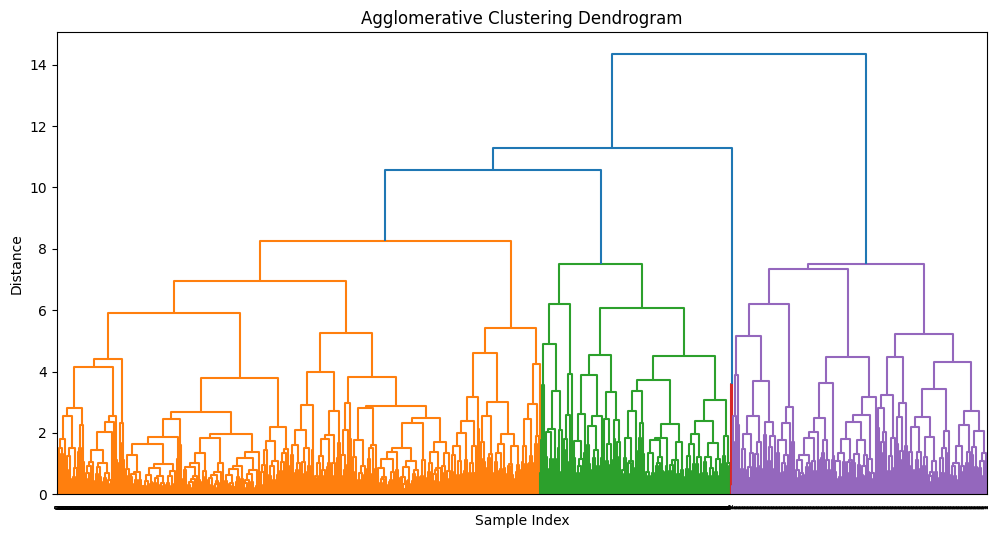

In [21]:
linkage_matrix = linkage(PCA_data, method='complete')

# Draw dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation='top', labels=data["Clusters"].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()